## 손실 곡선
패션 데이터셋을 적재하여 훈련 세트와 검증 세트로 나누기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [2]:
def model_fn(a_layer= None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer: # 함수에 매개변수로 은닉층 뒤에 또 하나의 층을 추가한다.
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


fit 메서드의 결과를 history 변수에 담아보기
- verbose: 훈련 과정 출력을 조절 / 기본값 1

In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 1s - loss: 0.5311 - accuracy: 0.8139 - 1s/epoch - 816us/step
Epoch 2/5
1500/1500 - 1s - loss: 0.3921 - accuracy: 0.8595 - 1s/epoch - 743us/step
Epoch 3/5
1500/1500 - 1s - loss: 0.3552 - accuracy: 0.8712 - 1s/epoch - 719us/step
Epoch 4/5
1500/1500 - 1s - loss: 0.3366 - accuracy: 0.8799 - 1s/epoch - 710us/step
Epoch 5/5
1500/1500 - 1s - loss: 0.3221 - accuracy: 0.8854 - 1s/epoch - 708us/step


In [5]:
print(history.history.keys()) # 손실, 정확도

dict_keys(['loss', 'accuracy'])


손실 감소

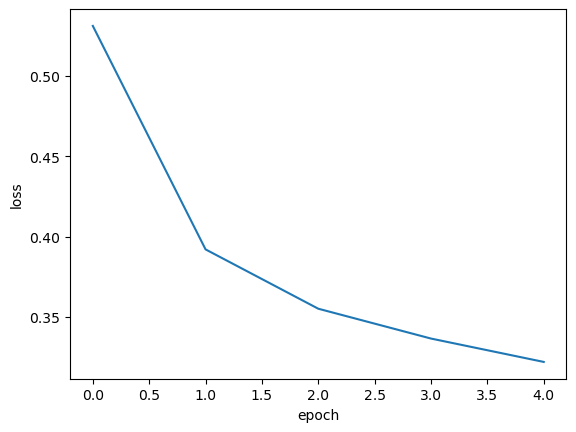

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

정확도 향상

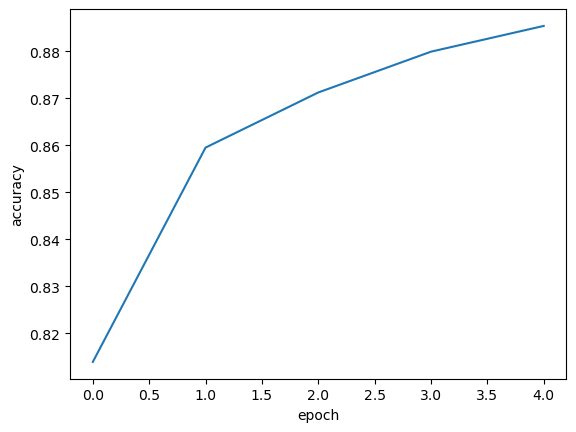

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크 횟수를 20으로 늘려서 훈련 후 그래프 그려보기

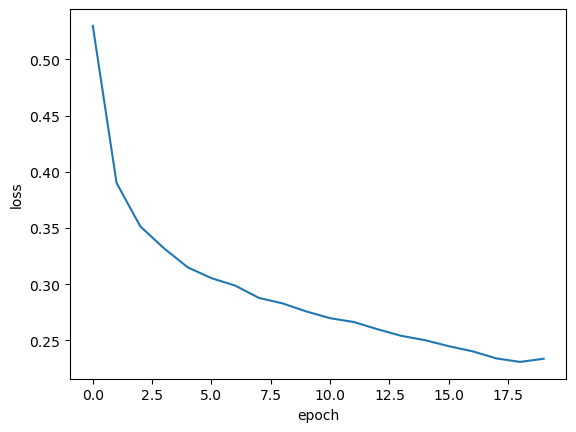

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증 손실

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


초기에 검증 손실이 감소하다가 다섯 번째 에포크에서 상승하기 시작한다.
- 훈련 손실: 과대적합 모델이 만들어 진다.

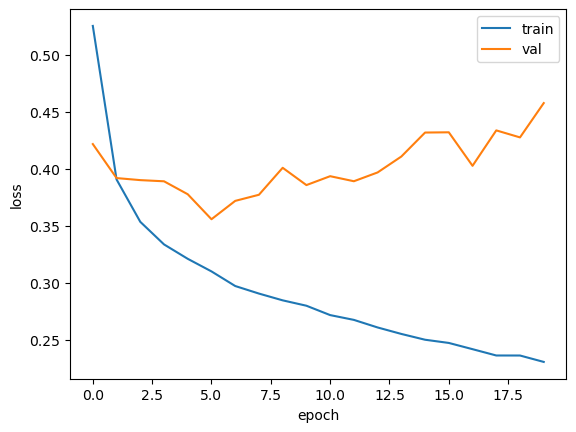

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합을 막기 위해 옵티마이저 하이퍼파라미터 조정하여 재훈련 해보기
- 결과 값: 과대적합이 줄었다.
    - 10번째 에포크까지 전반적인 감소 추세 -> adam 옵티마이저가 데이터셋에 잘 맞는다.

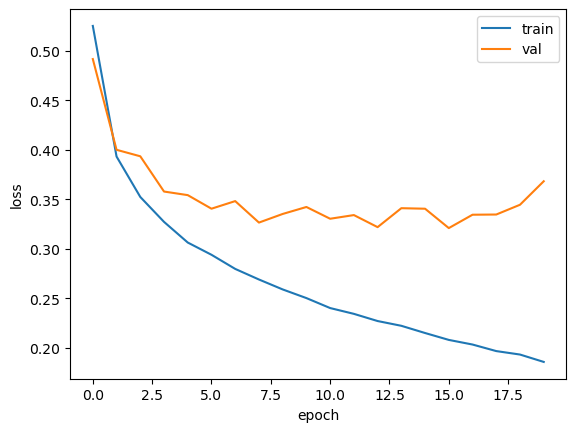

In [16]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data =(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃
훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 껴서 과대 적합을 막는다.

훈련되는 모델파라미터가 없다. 입출력의 크기가 같다.
- 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         


                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


드롭아웃으로 훈련을 한 뒤, 훈련 손실과 검증 손실의 그래프 그려보기
- 결과 값: 10 에포크에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 유지
    - 과대적합이 줄음

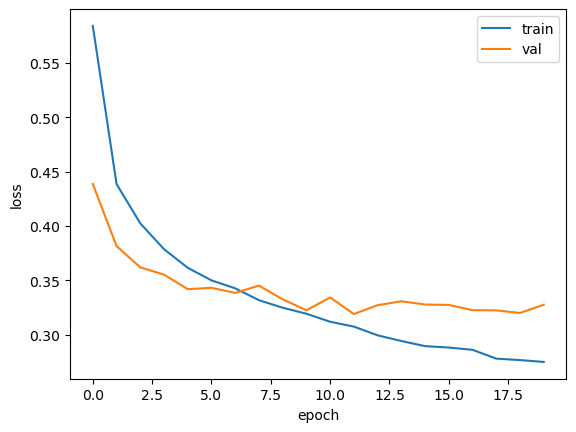

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 모델 저장과 복원

In [24]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

훈련된 모델의 파라미터를 저장하는 메서드 : save_weights()

In [25]:
model.save_weights('model-weights.h5')

In [26]:
model.save('model-whole.h5') # 모델과 파라미터를 함께 저장

/Users/leejieun/miniforge3/envs/ai/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
!ls -al *.h5

-rw-r--r--@ 1 leejieun  staff  333448 Apr  3 19:28 model-weights.h5
-rw-r--r--@ 1 leejieun  staff  982664 Apr  3 19:32 model-whole.h5


In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

검증 정확도 확인해보기
- axis= 1 : 열을 따라 각 행의 최댓값의 인덱스 선택

In [31]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 481us/step
0.8770833333333333


모델 전체의 검증 정확도 확인해보기
- load_model 함수는 evaluate() 사용 가능

In [32]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 486us/step - loss: 0.3407 - accuracy: 0.8771


[0.3406822681427002, 0.8770833611488342]

## 콜백
훈련 과정 중간에 작업을 수행할 수 있게 하는 객체
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data= (val_scaled, val_target), callbacks=[checkpoint_cb])

/Users/leejieun/miniforge3/envs/ai/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 493us/step - loss: 0.3192 - accuracy: 0.8838


[0.3191600441932678, 0.8837500214576721]

### 조기 종료
과대적합이 시작되기 전에 훈련을 미리 중지하는 것
- 훈련 에포크 횟수를 제한하는 역할

In [37]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # patience: 횟수만큼 검증 점수가 향상되지 않으면 훈련 중지
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/Users/leejieun/miniforge3/envs/ai/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


훈련 중지된 에포크 수: 0부터 시작하기에 14
- patience 2 지정했으므로 최상의 모델은 12번째 에포크

In [39]:
early_stopping_cb.stopped_epoch

13

결과 값: 13 에포크에서 훈련 중지

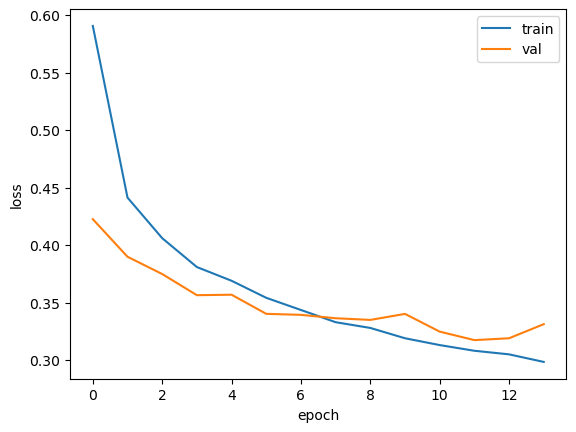

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

조기 종료로 얻은 모델을 사용하여 검증 세트에 대한 성능 확인해보기

In [41]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 503us/step - loss: 0.3173 - accuracy: 0.8853


[0.3173482120037079, 0.8853333592414856]